# Writing and embedding video in the IPython Notebook

This notebook demonstrates the process of generating a sequence of images in matplotlib, saving those images to disk as a .m4v video file with h264 encoding, and embedding of those images back in the notebook.

The embedding process requires that the video data be encoded with h264 codec (e.g. via the implementation of libx264 in ffmpeg). 

First we generate some test data -- a 3D block of gaussian noise

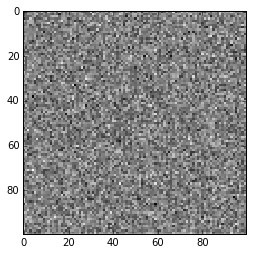

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

vol = np.random.randn(100,100,100)
plt.imshow(vol[:,:,0], cmap = 'gray', interpolation = 'None')

Next we generate the video file by making a matplotlib animation and saving to disk using ffmpeg with the libx264 codec

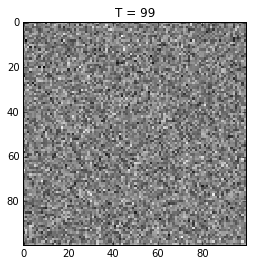

In [60]:
import matplotlib.animation as animation

# the name of our video file
vidName = 'demo.m4v'

# controls the area of the image in the video file
dpi = 100

# frames per second of video file
fps = 10

# codec used for encoding animation data to video -- only libx264 seems to work for embedding
codec = 'libx264'

# number of total frames to put in the video
nFrames = vol.shape[2]

# initialize the figure and axes
fig = plt.figure()
plt.subplot(111)
im = plt.imshow(vol[:,:,0],cmap='gray', interpolation = 'None')

# this updating function gets called for each frame of the animation
def update_img(t, vols, im):
    im.set_array(vol[:,:,t])
    plt.title('T = %i' %t)
    return im

# define the animation
ani = animation.FuncAnimation(fig, update_img, range(nFrames), interval = 100, fargs = (vol, im))
# define the animation writer
writer = animation.writers['ffmpeg'](fps = fps, codec = codec)

# save the animation
ani.save(vidName, writer = writer, dpi = dpi)

The following cell defines a function to load a local video file, encodes the raw video as base64 for http
transport, and uses the HTML5 video tag to load it.

In [51]:
def video(fname, mimetype):
    """Load the video in the file `fname`, with given mimetype, and display as HTML5 video.
    """
    from IPython.display import HTML
    video_encoded = open(fname, "rb").read().encode("base64")
    video_tag = '<video controls alt="test" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

Running the function we defined above will display the video in the notebook.

In [61]:
video(vidName,'x-m4v')